In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv("emails.csv")
df.head(20)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [27]:
df = df.iloc[:1001,:]

In [12]:
X = df.iloc[:,1:3001]
X

,spam
0,1
1,1
2,1
3,1
4,1
...,...
996,1
997,1
998,1
999,1


In [13]:
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=['spam'])
# Y = df.spam
# train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [14]:
#unigram
from sklearn.feature_extraction.text import CountVectorizer
corpus = train_x['text'].to_numpy()
vectorizer = CountVectorizer(min_df = 50)
C = vectorizer.fit_transform(corpus)

NameError: name 'train_x' is not defined

In [15]:
#bigram
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 50)
C2 = vectorizer2.fit_transform(corpus)

NameError: name 'corpus' is not defined

In [16]:
train_x_unigram = train_x.drop(columns=['text'])
train_x_bigram = train_x_unigram.copy()

vocab_unigram = vectorizer.get_feature_names()
counts_unigram = C.toarray()

vocab_bigram = vectorizer2.get_feature_names()
counts_bigram = C2.toarray()

#Vectorizing the training datas accordingly
for i in range(len(vocab_unigram)):
    train_x_unigram[vocab_unigram[i]] = counts_unigram[:,i]
for i in range(len(vocab_bigram)):
    train_x_bigram[vocab_bigram[i]] = counts_bigram[:,i]

NameError: name 'train_x' is not defined

In [17]:
print(test_x)

NameError: name 'test_x' is not defined

In [18]:
Y = df.iloc[:,-1].values
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25)

Accuracy Score for Naive Bayes :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       251

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



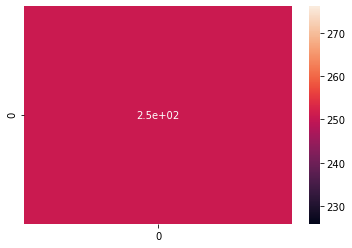

In [20]:
#Naive Bayes
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_pred1,test_y)
cl = classification_report(y_pred1,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [21]:
print(type(test_x))

<class 'pandas.core.frame.DataFrame'>


In [22]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_pred2,test_y)
cl = classification_report(y_pred2,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ValueError: The number of classes has to be greater than one; got 1 class

Accuracy Score of Random Forest Classifier :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       251

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



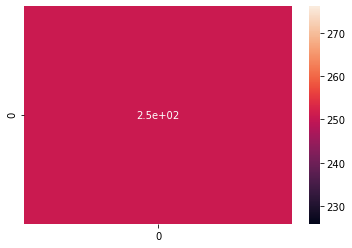

In [23]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(train_x,train_y)
y_pred3 = rfc.predict(test_x)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_pred3,test_y)
cl = classification_report(y_pred3,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=0).fit(train_x, train_y)
ypred4 = logmodel.predict(test_x)
print("Accuracy Score of Logistic Regression : ", accuracy_score(ypred4,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(ypred4,test_y)
cl = classification_report(ypred4,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

Accuracy Score of K-NN :  0.8685258964143426
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       187
           1       0.73      0.77      0.75        64

    accuracy                           0.87       251
   macro avg       0.82      0.83      0.83       251
weighted avg       0.87      0.87      0.87       251



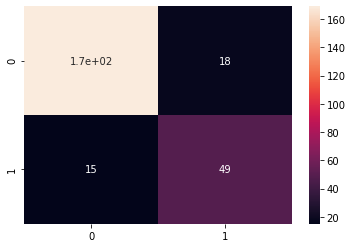

In [18]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(train_x, train_y)

ypred5 = knn.predict(test_x)
print("Accuracy Score of K-NN : ", accuracy_score(ypred5,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(ypred5,test_y)
cl = classification_report(ypred5,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [23]:
class combinedModel:
    def __init__(self):
        self.mnb = MultinomialNB(alpha=1.9)
        self.svc = SVC(C=1.0,kernel='rbf',gamma='auto')     
        self.rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
        self.logmodel = LogisticRegression(random_state=0)
        self.knn = KNeighborsClassifier(n_neighbors=7)
        print("Model initialized")
    def fit(self,train_x,train_y):
        print("Training...")
        self.mnb.fit(train_x,train_y)
        print("Naive Bayes trained")
        self.svc.fit(train_x,train_y)
        print("SVM trained")
        self.rfc.fit(train_x,train_y)
        print("Random Forest Model Trained")
        self.logmodel.fit(train_x,train_y)
        print("Logistic Regression Model Trained")
        self.knn.fit(train_x, train_y)
        print("K-NN Model trained")
    def predict(self,test_x):
        r = []
        r.append(self.mnb.predict(test_x))
        r.append(self.svc.predict(test_x))
        r.append(self.rfc.predict(test_x))
        r.append(self.logmodel.predict(test_x))
        r.append(self.knn.predict(test_x))
        s = np.array([])
        s = np.add(r[0],r[1])
        s = np.add(s,r[2])
        s = np.add(s,r[3])
        s = np.add(s,r[4])
        results = []
        for x in s:
            if x>=3:
                results.append(1)
            else:
                results.append(0)
        return np.array(results)

In [24]:
com = combinedModel()
com.fit(train_x,train_y)
ypred = com.predict(test_x)
print("Accuracy Score of Combined Model : ", accuracy_score(ypred,test_y))
# print(ypred)

Model initialized
Training...
Naive Bayes trained
SVM trained
Random Forest Model Trained


C:\Users\VINUBALAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Trained
K-NN Model trained
Accuracy Score of Combined Model :  0.9601593625498008


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       188
           1       0.90      0.95      0.92        63

    accuracy                           0.96       251
   macro avg       0.94      0.96      0.95       251
weighted avg       0.96      0.96      0.96       251



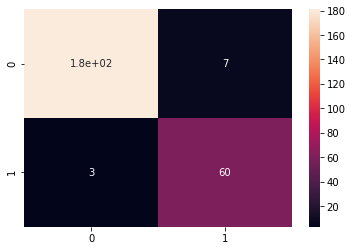

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(ypred,test_y)
cl = classification_report(ypred,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("emails.csv")
df = df.sample(n=1000)

In [3]:
from nltk import word_tokenize

In [4]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

In [5]:
df['count']=df['text'].apply(count_words)

In [6]:
import string
from nltk.corpus import stopwords

In [7]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [8]:
df['text']=df['text'].apply(process_text)

KeyboardInterrupt: 

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [ ]:
df['text']=df['text'].apply(stemming)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(message_bow,df['spam'],test_size=0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Naive Bayes
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_pred1,test_y)
cl = classification_report(y_pred1,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_pred2,test_y)
cl = classification_report(y_pred2,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(train_x,train_y)
y_pred3 = rfc.predict(test_x)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_pred3,test_y)
cl = classification_report(y_pred3,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=0).fit(train_x, train_y)
ypred4 = logmodel.predict(test_x)
print("Accuracy Score of Logistic Regression : ", accuracy_score(ypred4,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(ypred4,test_y)
cl = classification_report(ypred4,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(train_x, train_y)

ypred5 = knn.predict(test_x)
print("Accuracy Score of K-NN : ", accuracy_score(ypred5,test_y))
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(ypred5,test_y)
cl = classification_report(ypred5,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
class combinedModel:
    def __init__(self):
        self.mnb = MultinomialNB(alpha=1.9)
        self.svc = SVC(C=1.0,kernel='rbf',gamma='auto')     
        self.rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
        self.logmodel = LogisticRegression(random_state=0)
        self.knn = KNeighborsClassifier(n_neighbors=7)
        print("Model initialized")
    def fit(self,train_x,train_y):
        print("Training...")
        self.mnb.fit(train_x,train_y)
        print("Naive Bayes trained")
        self.svc.fit(train_x,train_y)
        print("SVM trained")
        self.rfc.fit(train_x,train_y)
        print("Random Forest Model Trained")
        self.logmodel.fit(train_x,train_y)
        print("Logistic Regression Model Trained")
        self.knn.fit(train_x, train_y)
        print("K-NN Model trained")
    def predict(self,test_x):
        r = []
        r.append(self.mnb.predict(test_x))
        r.append(self.svc.predict(test_x))
        r.append(self.rfc.predict(test_x))
        r.append(self.logmodel.predict(test_x))
        r.append(self.knn.predict(test_x))
        s = np.array([])
        s = np.add(r[0],r[1])
        s = np.add(s,r[2])
        s = np.add(s,r[3])
        s = np.add(s,r[4])
        results = []
        for x in s:
            if x>=3:
                results.append(1)
            else:
                results.append(0)
        return np.array(results)

In [ ]:
com = combinedModel()
com.fit(train_x,train_y)
ypred = com.predict(test_x)
print("Accuracy Score of Combined Model : ", accuracy_score(ypred,test_y))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(ypred,test_y)
cl = classification_report(ypred,test_y)
print(cl)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [29]:
#idha apdiye podadha da idhu ni predict panna list ah vachu podu
ypred = np.array([0,1,0,1,0,0,1])
for i in range(len(ypred)):
    if ypred[i]==0:
        print("ham")
    else:
        print("spam")

ham
spam
ham
spam
ham
ham
spam
